#Prediksi Sentiment Twitter

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import nltk
import joblib

# Download the WordNet resource
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import files
files.upload()  # Pilih file kaggle.json yang telah Anda download

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kagg1efvt1h","key":"8e60896111a6c17cb7800673362afc20"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 25.5MB/s]


In [ ]:
!unzip twitter-entity-sentiment-analysis.zip

Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
data = pd.read_csv("twitter_training.csv")
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


## pengenalan data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# Rename columns
data2 = data.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 'Positive': 'Sentiment', 'Borderlands':"Branch"})
data2.head()

,2401,Branch,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   2401       74681 non-null  int64 
 1   Branch     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
print(data2.columns)

Index(['2401', 'Branch', 'Sentiment', 'Tweet'], dtype='object')


In [ ]:
#Menghapus kolom 2401
data3 = data2.drop('2401', axis=1)
data3.head(10)

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...
5,Borderlands,Positive,So I spent a few hours making something for fu...
6,Borderlands,Positive,So I spent a couple of hours doing something f...
7,Borderlands,Positive,So I spent a few hours doing something for fun...
8,Borderlands,Positive,So I spent a few hours making something for fu...
9,Borderlands,Positive,2010 So I spent a few hours making something f...


** MENGHILANGKAN missing values dan data duplikat**

In [ ]:
#mengecek nilai yang hilang
print(data3.isnull().sum())

Branch         0
Sentiment      0
Tweet        686
dtype: int64


In [ ]:
#menghilangkan missing value
data3.dropna(inplace=True)
# check missing values
data3.isnull().sum()

Branch       0
Sentiment    0
Tweet        0
dtype: int64

In [ ]:
#Mengecek data duplikat
data3.duplicated().sum()

3038

In [ ]:
#Menghapus sata suplikat
delete_duplicates = data3.drop_duplicates()
data3 = delete_duplicates
# check duplicate values
data3.duplicated().sum()

0

In [ ]:
#Menyimpan data yang telah diprepocressing poertama  (untuk backup)
data3.to_csv('DatasetTwitter_PP1.csv')

## **Visualisasi Data**

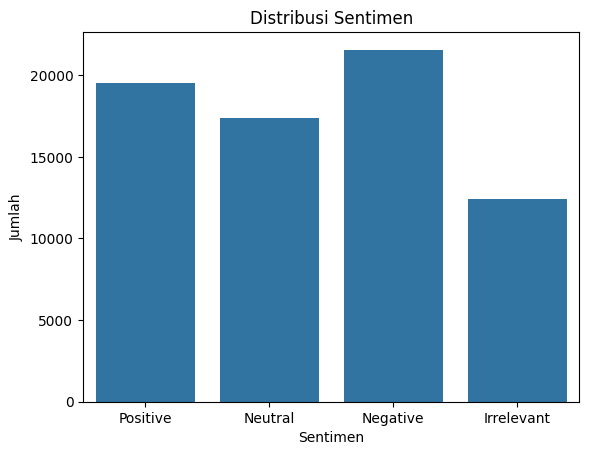

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Sentiment', data=data3)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

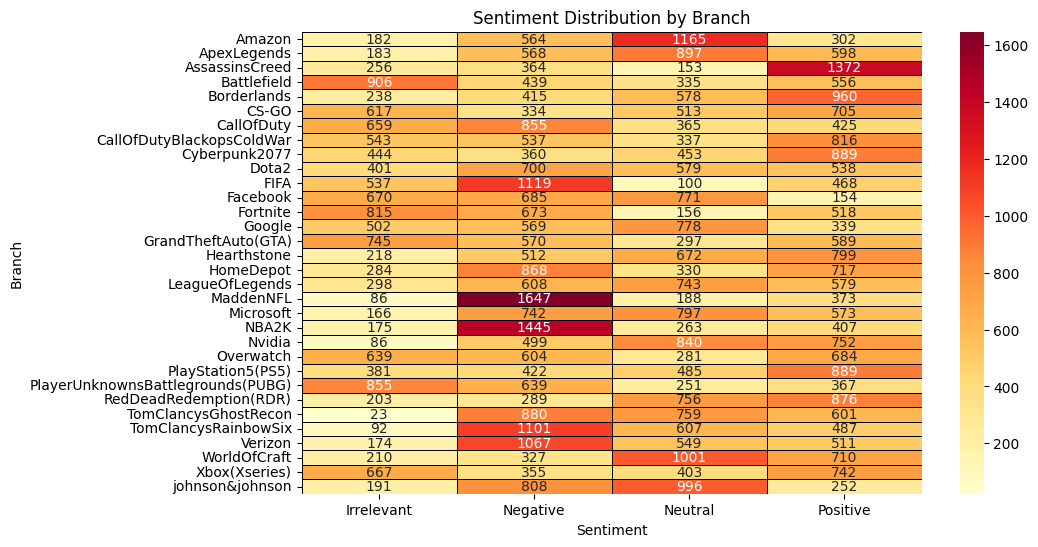

In [ ]:
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=data3['Branch'], columns=data3['Sentiment'])
sns.heatmap(count_table, cmap='YlOrRd', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Branch')
plt.xlabel('Sentiment')
plt.ylabel('Branch')
plt.show()

In [ ]:
for sentiment in count_table.columns:
    min_branch = count_table[sentiment].idxmin()
    max_branch = count_table[sentiment].idxmax()
    min_val = count_table[sentiment].min()
    max_val = count_table[sentiment].max()
    print(f"Sentiment '{sentiment}':")
    print(f"  Minimum value '{min_val}' at Branch '{min_branch}'")
    print(f"  Maximum value '{max_val}' at Branch '{max_branch}'\n")

Sentiment 'Irrelevant':
  Minimum value '23' at Branch 'TomClancysGhostRecon'
  Maximum value '906' at Branch 'Battlefield'

Sentiment 'Negative':
  Minimum value '289' at Branch 'RedDeadRedemption(RDR)'
  Maximum value '1647' at Branch 'MaddenNFL'

Sentiment 'Neutral':
  Minimum value '100' at Branch 'FIFA'
  Maximum value '1165' at Branch 'Amazon'

Sentiment 'Positive':
  Minimum value '154' at Branch 'Facebook'
  Maximum value '1372' at Branch 'AssassinsCreed'



###Word CLoud

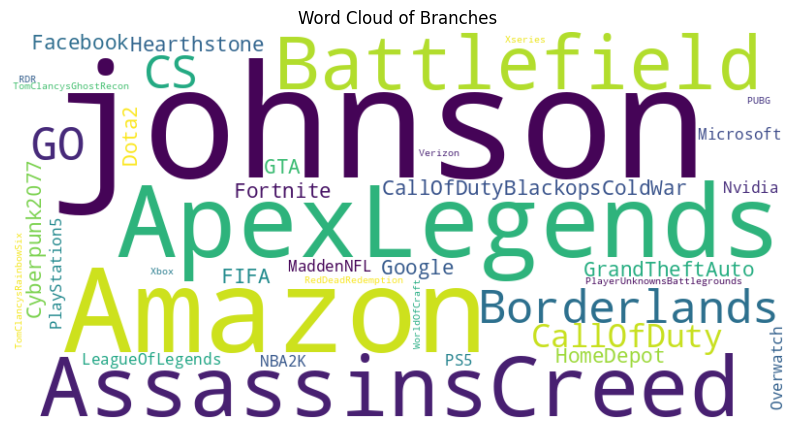

In [ ]:
# Convert branches to a single string
branches_text = ' '.join(count_table.index)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(branches_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Branches')
plt.axis('off')
plt.show()

In [ ]:
print(data3.columns)


Index(['Branch', 'Sentiment', 'Tweet'], dtype='object')


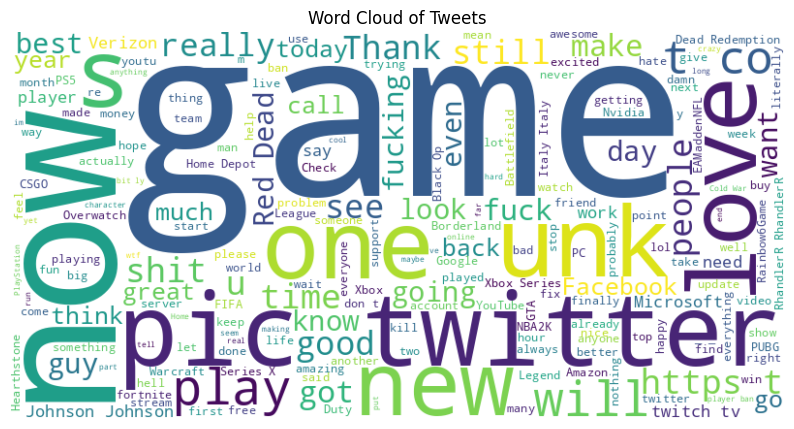

In [ ]:
# Concatenate all tweets into a single string
all_tweets_text = ' '.join(data3['Tweet'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

##Preprocessing Data

###menghilangkan non string

In [ ]:
def filter_non_string(data3, column):
    """
    Filter out rows with non-string values in the specified column.
    Convert non-string values to strings.
    """
    data3 = data3.dropna(subset=[column])
    data3[column] = data3[column].astype(str)
    return data3

###mengubah semua menjadi lowercase

In [ ]:
def normalize_text(text):
    """Convert text to lowercase to ensure consistency across the corpus."""
    return text.lower()

###menghilangkan HTML tags

In [ ]:
def remove_html_tags(text):
  return re.sub(r'<.*?>', '', text)

###menghilangkan URL

In [ ]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

###menghilangkan digit numerik

In [ ]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

###menghilangkan tanda baca

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

###Tokenisasi

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

###menghilangkan stopwords

In [ ]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

###menghilangkan emoji

In [ ]:
import re

def remove_emojis(text):
    """Remove emojis from the text."""
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

###mengubah data menjadi biner

In [ ]:
def vectorize_data(text_data):
    # Join the tokenized text into strings
    text_data_strings = [" ".join(tokens) for tokens in text_data]
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    # Fit and transform the text data to generate TF-IDF vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(text_data_strings)
    return tfidf_vectors, tfidf_vectorizer

In [ ]:
def preprocess_text(data3):
    data3 = filter_non_string(data3, 'Tweet')
    data3['Tweet'] = data3['Tweet'].apply(normalize_text)
    data3['Tweet'] = data3['Tweet'].apply(remove_html_tags)
    data3['Tweet'] = data3['Tweet'].apply(remove_urls)
    data3['Tweet'] = data3['Tweet'].apply(remove_numbers)
    data3['Tweet'] = data3['Tweet'].apply(remove_punctuation)
    data3['Tweet'] = data3['Tweet'].apply(tokenize_text)
    data3['Tweet'] = data3['Tweet'].apply(remove_stopwords)
    data3['Tweet'] = data3['Tweet'].apply(remove_emojis)
    return data3

# Usage:
data_processed = preprocess_text(data3)

In [ ]:
print(data_processed) #menampilkan dataset fix

            Branch Sentiment  \
0      Borderlands  Positive   
1      Borderlands  Positive   
2      Borderlands  Positive   
3      Borderlands  Positive   
4      Borderlands  Positive   
...            ...       ...   
74676       Nvidia  Positive   
74677       Nvidia  Positive   
74678       Nvidia  Positive   
74679       Nvidia  Positive   
74680       Nvidia  Positive   

                                                   Tweet  
0                                [coming, borders, kill]  
1                       [im, getting, borderlands, kill]  
2                      [im, coming, borderlands, murder]  
3                     [im, getting, borderlands, murder]  
4                     [im, getting, borderlands, murder]  
...                                                  ...  
74676  [realized, windows, partition, mac, like, year...  
74677  [realized, mac, window, partition, years, behi...  
74678  [realized, windows, partition, mac, years, beh...  
74679  [realized, windows

In [ ]:
#Menyimpan data yang telah dipisahkan
data_processed.to_csv('DatasetTwitter_Fix.csv')

##Model


###Split data

In [ ]:
data_processed['Tweet'] = data_processed['Tweet'].apply(lambda x: ' '.join(x))

# Split data into features (X) and target (y)
X = data_processed['Tweet']  # Features
y = data_processed['Sentiment']  # Target

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56765,)
Shape of X_test: (14192,)
Shape of y_train: (56765,)
Shape of y_test: (14192,)


###Model pengujian

####Menggunakan Random Forest (Model Asli)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9062147688838782


####Menggunakan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Membuat instance dari DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dt_classifier.fit(X_train_tfidf, y_train)

# Memprediksi data uji
y_pred = dt_classifier.predict(X_test_tfidf)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7830467869222097


####Menggunakan Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Membuat instance dari GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Melatih model dengan data latih
gb_classifier.fit(X_train_tfidf, y_train)

# Memprediksi data uji
y_pred = gb_classifier.predict(X_test_tfidf)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.5228297632468997


####Menggunakan Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Mengubah teks menjadi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

# Membuat dan melatih model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_cv, y_train)

# Memprediksi data uji
y_pred = nb_classifier.predict(X_test_cv)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7417559188275085


###Confusion Matrix

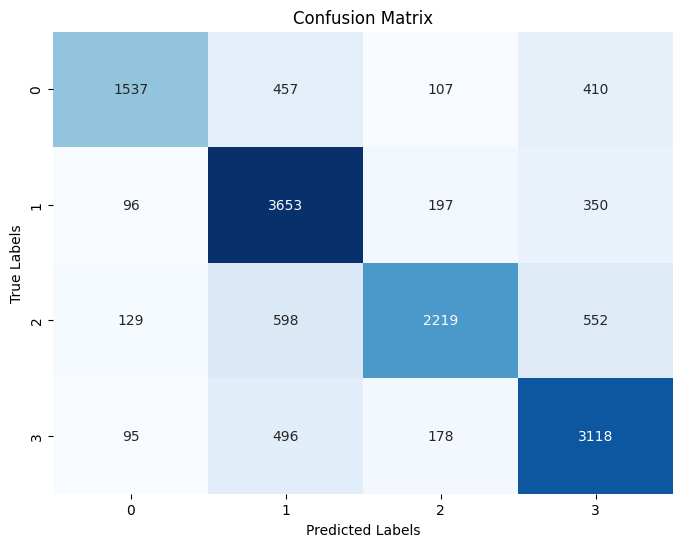

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.83      0.61      0.70      2511
    Negative       0.70      0.85      0.77      4296
     Neutral       0.82      0.63      0.72      3498
    Positive       0.70      0.80      0.75      3887

    accuracy                           0.74     14192
   macro avg       0.76      0.72      0.73     14192
weighted avg       0.75      0.74      0.74     14192



In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

###perbandingan data asli dan prediksi

In [ ]:
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Tweet Text:
Tweet: women please work stores like circuit home hardware get bored condescending men thinking ’ know another screw
Actual Label: Positive
Predicted Label: Negative
-----------------------
Tweet: zai absolute beast reddit fe
Actual Label: Neutral
Predicted Label: Positive
-----------------------
Tweet: hard fought indeed …
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: rhandlerr ’ superstar solo wins criminal deserved pictwittercomhilloxffi
Actual Label: Irrelevant
Predicted Label: Irrelevant
-----------------------
Tweet: ea eamaddennfl recent announcement ea locked another long term contract nfl remarkably disrespectful fans madden years allow competition madden longer quality
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: first played apex got wave happiness brings back
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: speed better ever however d

###Menyimpan Model

In [ ]:
import joblib

# menyimpan model pelatihan
joblib.dump(rf_classifier, 'rf_model_decisontree.pkl')

['rf_model_decisontree.pkl']

###Prediksi menggunakan model yang dibuat

In [ ]:
Tweet_Sentiment_Ai = joblib.load('rf_model_decisontree.pkl') #LOAD model MLnya

# definisi kan emoji sesuai dengan sentimentnya
sentiment_emojis = {
    'Positive': '😄',
    'Negative': '😞',
    'Neutral': '😐',
    'Irrelevant': '🤷‍♂️'
}

#  masukan tweets
tweets = [
    "I just finished playing Borderlands and it was absolutely amazing! Can't wait for the next one!",
    "I'm really disappointed with the latest Borderlands update. It ruined the game for me.",
    "Haven't played Borderlands in a while. Need to catch up on the latest updates.",
    "Help me superman"
]


# Transform example tweets into TF-IDF features
tweets_tfidf = vectorizer.transform(tweets)

# Prediksi tweets
predictions = Tweet_Sentiment_Ai.predict(tweets_tfidf)

# Print the predicted sentiment and corresponding emoji for each example tweet
for tweet, prediction in zip(tweets, predictions):
    sentiment = prediction
    emoji = sentiment_emojis[sentiment]  # Get the emoji directly from the mapping without a default value
    print("Tweet:", tweet)
    print("Sentiment:", sentiment)
    print("Emoji:", emoji)
    print()

Tweet: I just finished playing Borderlands and it was absolutely amazing! Can't wait for the next one!
Sentiment: Positive
Emoji: 😄

Tweet: I'm really disappointed with the latest Borderlands update. It ruined the game for me.
Sentiment: Negative
Emoji: 😞

Tweet: Haven't played Borderlands in a while. Need to catch up on the latest updates.
Sentiment: Neutral
Emoji: 😐

Tweet: Help me superman
Sentiment: Irrelevant
Emoji: 🤷‍♂️

